<a href="https://colab.research.google.com/github/tominh/numerik/blob/master/Linear_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rumus Regresi**
Oleh : Tomi Nurhidayat

Lihat Code Asli [di sini](https://github.com/tominh/numerik/blob/master/Linear_Regression_Analysis.ipynb)

# Cara Menginput Data

1. Temukan code variabel "**dataX**" dan "**dataY**".

2. Pehatikan di variabel **dataX** terdapat **np.array([1,2,3,4,5,6,7,8,9,10])**, begitupun di variabel **dataY** terdapat **np.array([5,5.6,7,7.4,9,10,10.5,12,12.7,14])**.
  * Angka 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 merupakan representasi data X. 

  * Angka 5, 5.6, 7, 7.4, 9, 10, 10.5, 12, 12.7, 14 merupakan representasi data Y.

## **Contoh :**

Jika hendak melakukan perhitungan regresi linear menggunakan data lain misal:

X = 4, 5, 6, 7, 8, 9, 10

Y = 5, 6, 7, 8, 8.7, 9.8, 11

Maka tinggal ubah saja nilainya tapi harus berurutan. Sehingga tampilannya menjadi seperti berikut

dataX = np.array([4, 5, 6, 7, 8, 9, 10])

dataY = np.array([5, 6, 7, 8, 8.7, 9.8, 11])

Jika sudah menginputkan data X dan Y tinggal jalankan program ini.

# Cara Menjalankan Program

## Cara 1

1. Temukan menu "**Runtime**" di menu bar atas, lalu klik.
2. Kemudian klik "**Run All**".
3. Tunggu sebentar proses program berjalan.

## Cara 2
1. Tekan **CTRL + F9**.
2. Tunggu sebentar proses program berjalan.

# Hasil Perhitungan
Hasil perhitungan regresi bisa dilihat di bagian paling bawah, lengkap dengan grafik linearnya.

In [1]:
# Program Rumus Regresi
# By : Tomi Nurhidayat

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

def regressionFunction(X, Y):
  # Variabel kosong bertipe array untuk menyimpan data x dan y
  x = X
  y = Y

  garis = '='*50
  print(garis, '\nUntuk Menghitung Regresi Diperlukan Data > 2')
  print(garis)

  banyakData = len(x)

  # gradien, titik potong sb y, faktor korelasi, dsb jangan tertukar urutan
  slope, intercept, r, p, std_err = stats.linregress(x, y)

  # fungsi untuk regresinya
  def fungsi(x):
      return slope*x + intercept

  # pemodelan
  pemodelan = list(map(fungsi, x))

  # Untuk mencacri Sy
  def Sy(a, b, c, d, e, f):
      syKuadrat = (a - ((b*c)-2*d+(banyakData*e)) /
                    ((banyakData*b)-f))/(banyakData-2)
      sy = np.sqrt(syKuadrat)
      return sy

  # Untuk mencari gradien

  def gradien(a, b, c, d, e):
      m = ((banyakData*a)-(b*c))/((banyakData*d)-e)
      return m

  # Untuk mencari ralat gradien

  def ralatGradien(a, b, c):
      ralatGradien = a*np.sqrt(banyakData/((banyakData*b)-c))
      return ralatGradien

  # Untuk mencari titik potong

  def titikPotong(a, b, c, d, e):
      titikPotong = ((a*b)-(c*d))/((banyakData*a)-e)
      return titikPotong

  # Untuk mencari ralat titik potong

  def ralatTitikpotong(a, b, c):
      ralatTitikpotong = a*np.sqrt(b/((banyakData*b)-c))
      return ralatTitikpotong

  # Untuk mencari sigma X dan sigma Y
  sigmaX = 0
  sigmaY = 0
  for i in range(banyakData):
      sigmaX = sigmaX + x[i]
      sigmaY = sigmaY + y[i]

  # Untuk mencari (sigma X) kuadrat dan (sigma Y) kuadrat
  sigmaXkuadrat = pow(sigmaX, 2)
  sigmaYkuadrat = pow(sigmaY, 2)

  # Untuk mencari sigma(X dikuadratkan) dan sigma(Y dikuadratkan)
  sigmaXdikuadrat = 0
  sigmaYdikuadrat = 0
  for k in range(banyakData):
      sigmaXdikuadrat = sigmaXdikuadrat + pow(x[k], 2)
      sigmaYdikuadrat = sigmaYdikuadrat + pow(y[k], 2)

  # Untuk mencari xy
  sigmaxy = 0
  for a in range(banyakData):
      sigmaxy = sigmaxy + x[a]*y[a]

  # Untuk (sigmaXY) dikuadratkan
  sigmaXYkuadrat = pow(sigmaxy, 2)

  # Untuk mencari sigmaX.sigmaY.sigmaXY
  sigmaXsigmaYsigmaXY = sigmaX*sigmaY*sigmaxy

  # Nilai Sy
  sY = Sy(sigmaYdikuadrat, sigmaXdikuadrat, sigmaYkuadrat,
          sigmaXsigmaYsigmaXY, sigmaXYkuadrat, sigmaXkuadrat)
  # Nilai gradien
  gradien = gradien(sigmaxy, sigmaX, sigmaY, sigmaXdikuadrat, sigmaXkuadrat)
  # Nilai ralat gradien
  ralatGradien = ralatGradien(sY, sigmaXdikuadrat, sigmaXkuadrat)
  # Nilai titik potong
  titikPotong = titikPotong(sigmaXdikuadrat, sigmaY,
                            sigmaX, sigmaxy, sigmaXkuadrat)
  # Nilai ralat titik potong
  ralatTitikpotong = ralatTitikpotong(sY, sigmaXdikuadrat, sigmaXkuadrat)

  # Titik potong sb X
  titikPotongX = -(titikPotong)/gradien

  print('sigmaX :', sigmaX)
  print('(sigmaX)^2 :', sigmaXkuadrat)
  print('sigma(X^2) :', sigmaXdikuadrat)
  print('sigmaY :', sigmaY)
  print('(sigmaY)^2 :', sigmaYkuadrat)
  print('sigma(Y^2) :', sigmaYdikuadrat)
  print('sigmaXY :', sigmaxy)
  print('sigmaXsigmaYsigmaXY :', sigmaXsigmaYsigmaXY)
  print('(sigmaXY)^2 :', sigmaXYkuadrat, '\n')

  # Untuk menampilkan Sy, gradien, titik potong
  print('Sy :', sY)
  print('gradien :', gradien)
  print('ralat gradien :', ralatGradien)
  print('titik potong sumbu Y :', titikPotong)
  print('ralat titik potong sumbu Y :', ralatTitikpotong)
  print('titik potong sumbu X :', titikPotongX)
  print('faktor korelasi :', r)
  print('Y =', gradien, 'X + (', titikPotong, ')')

  # Untuk membuat grafik
  plt.scatter(x, y)
  plt.plot(x, pemodelan)
  plt.grid(True)
  plt.title('Y = BX + A')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()

In [2]:
# inputkan data x di sini
dataX = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# inputkan data y di sini
dataY = np.array([5, 5.6, 7, 7.4, 9, 10, 10.5, 12, 12.7, 14])

In [3]:
# di sini untuk menampilkan data yang sudah diinputkan
pd.DataFrame({'x':dataX, 'y':dataY})

,x,y
0,1,5.0
1,2,5.6
2,3,7.0
3,4,7.4
4,5,9.0
5,6,10.0
6,7,10.5
7,8,12.0
8,9,12.7
9,10,14.0


Untuk Menghitung Regresi Diperlukan Data > 2
sigmaX : 55
(sigmaX)^2 : 3025
sigma(X^2) : 385
sigmaY : 93.2
(sigmaY)^2 : 8686.24
sigma(Y^2) : 952.66
sigmaXY : 595.6
sigmaXsigmaYsigmaXY : 3053045.6
(sigmaXY)^2 : 354739.36000000004 

Sy : 0.25811085238936177
gradien : 1.006060606060606
ralat gradien : 0.0284170695866566
titik potong sumbu Y : 3.7866666666666666
ralat titik potong sumbu Y : 0.17632327977291035
titik potong sumbu X : -3.763855421686747
faktor korelasi : 0.9968238764813895
Y = 1.006060606060606 X + ( 3.7866666666666666 )


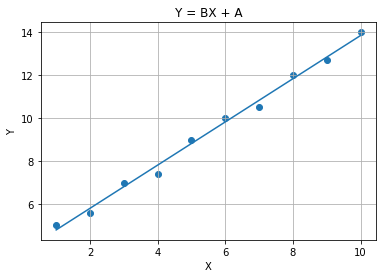

In [4]:
# menampilkan hasil regresi
regressionFunction(dataX, dataY)

## Keterangan

sigmaX : $𝚺x_i$

(sigmaX)^2 : $(𝚺x_i)^2$

sigma(X^2) : $𝚺x_i^2$

sigmaY : $𝚺y_i$

(sigmaY)^2 : $(𝚺y_i)^2$

sigma(Y^2) : $𝚺y_i^2$

sigmaXY : $𝚺x_iy_i$

sigmaXsigmaYsigmaXY : $𝚺x_i𝚺y_i𝚺x_iy_i$

(sigmaXY)^2 : $(𝚺x_iy_i)^2$